# Item Based Collaborative Filtering

In [1]:
import pandas as pd
from pandas import Series
import json
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import random

def load_jsons(data_path, file):
    """ helper function to load '.json' files (they're not proper jsons) """
    file_path = data_path + file
    with open(file_path) as jsons:
        lines = [json.loads(json_line) for json_line in jsons]
    return pd.DataFrame(lines)

# Deel 1: Inladen en filteren van de data

In [30]:
# Load data for town called Henderson
data_path = './data/akron/'
review_file = 'review.json'
business_file = 'business.json'
user_file = 'user.json'
tip_file = 'tip.json'
checkin_file = 'checkin.json'

reviews = load_jsons(data_path, review_file)
businesses = load_jsons(data_path, business_file)
users = load_jsons(data_path, user_file)
tips = load_jsons(data_path, tip_file)
checkins = load_jsons(data_path, checkin_file)

In [31]:
display(reviews.head())
display(businesses.head())
print(len(reviews))
display(users.head())
display(tips.head())
display(checkins.head())

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,vGrbnWbKvGRoEnJGxHlZpA,jF7X0CHBcfa9BQEe3rvcOA,HOU5UUTb29yLmEz_0hteEw,4.0,0,0,0,My wife and I had an anniversary dinner there ...,2015-04-15 12:44:51
1,IlnSADSjtzs47BJ7fgfMYA,7kz6lBbeeoEbq2Mkkt-1kw,qBZuI7didMgfaGu5H0J7jw,5.0,1,1,1,Great service and wonderful baked goods. We or...,2018-03-15 20:07:52
2,9O2-IEA-Zr_k765dZ7y11g,wM7HTh-ixzNpZfTvFZmbuw,7DIzmSvGDbiqw61LsyiOSg,4.0,0,0,1,Love Gabes! This place is awesome for a deal....,2013-05-07 12:48:53
3,_RlQhP-ULbaZb2pqO7LKpA,MjFKbR_0CM_GXzeN22THzA,dxh4eQyUPxoD0uupjuqjug,1.0,5,5,5,This place is very unimpressive I've had bette...,2014-04-19 15:10:14
4,XQ0hbOjTt-pKVyhtTKmQfA,by5zen9RLjr0nRKZJOwLfQ,HOU5UUTb29yLmEz_0hteEw,4.0,0,0,0,Lovely Friday night Italian dinner. The Caesar...,2014-06-28 00:40:22


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,p8u03IURLPg_5jYSY3OmMQ,Farmer Boy,610 E Cuyahoga Falls Ave,Akron,OH,44310,41.113789,-81.496875,3.0,34,1,"{'RestaurantsPriceRange2': '1', 'RestaurantsAt...","American (New), Restaurants",None
1,7DIzmSvGDbiqw61LsyiOSg,Gabriel Brothers,1890 W Market St,Akron,OH,44334,41.110139,-81.576593,3.0,7,1,"{'BusinessParking': '{'garage': False, 'street...","Shopping, Fashion",None
2,z6kCzBQt5Vv1KFkQgrhVnA,The UPS Store,1700 W Market St,Akron,OH,44313,41.109594,-81.570504,4.0,4,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Mailbox Centers, Local Servi...","{'Monday': '0:0-0:0', 'Tuesday': '8:30-19:0', ..."
3,Sr_VUJBhqcKCDLRv0JkrDg,McDonald's,1650 Copley Rd,Akron,OH,44320,41.084159,-81.581385,1.0,3,1,"{'RestaurantsReservations': 'False', 'Restaura...","Coffee & Tea, Burgers, Fast Food, Restaurants,...","{'Monday': '5:0-23:0', 'Tuesday': '5:0-23:0', ..."
4,eeLYKjBBRESPtr8zLqCWBg,Doubletree Hotel Akron/Fairlawn,3150 W Market St,Akron,OH,44333,41.130044,-81.615561,3.5,13,1,"{'RestaurantsPriceRange2': '2', 'WiFi': 'u'fre...","Event Planning & Services, Venues & Event Spac...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."


9193


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,t-nB38eHbeFuabXBdJMwvg,Katharine,412,2008-06-13 14:48:51,1816,463,1341,"2011,2012,2013,2014,2015,2016,2017,2018","2Y1pwMu2pZJDGQ7moD-2gQ, Qlys2g0R3PfNAuMOhagwLA...",77,...,3,4,1,1,60,64,140,140,120,65
1,NJqmAzerpbAIC0-VBclwgA,Kim,400,2011-01-06 19:09:05,941,349,508,"2012,2013,2014,2015,2016,2017,2018","aAPG4k9TrIVmAGCVUgfQnQ, tN2ml7LWTM2AcZz6JI7ZuQ...",54,...,9,7,0,0,57,79,88,88,36,11
2,AxFluVrPUVN0pPBX7LD--A,Michelle,30,2013-08-29 23:03:52,15,4,4,,"BExU0vvIxann72sTBxiKBg, 9us19qLv73dgNjBPLcXcTg...",1,...,0,0,0,0,2,1,2,2,0,0
3,tWVlSt-66fl6bk9_5UzltQ,Jennifer,302,2012-05-11 17:16:04,840,709,361,"2012,2013,2014,2015,2016,2017","atfOidazPQ0gtIKMc_xqIA, rBVubLc9uLDZLrIhd7OiQg...",29,...,10,0,4,1,19,48,32,32,15,4
4,PpP6-F0k4TQzC7I77ZbpJw,April,321,2014-04-15 03:54:01,314,107,114,"2015,2016,2017,2018","NbWbVyJqv3yWGkMii5P5Gw, qfk7kikPZmSc4D1lmQgMmA...",20,...,0,0,0,0,6,5,4,4,4,9


,user_id,business_id,text,date,compliment_count
0,D6iI_B7BFRGrNgDcZcojmw,9B1ivc2ztvI8XDJ5TeE5eA,Terrible service and staff. Be careful if you ...,2013-08-24 02:38:49,0
1,xzFwCeHtPczly7G8BRx9Qg,8aaD2GaO--JkuTeql0RIBw,Krissy rocked my pedicure. Highly recommended!,2014-03-18 23:40:38,0
2,8mWdWX3f1BlK3aBckdAcgw,mnqGWXdqBq73_exmNOEkwQ,Order elsewhere . This place blows,2015-02-20 04:00:55,0
3,42P_hSlGg0Lgj6wl9-eDjw,-CBW4yvallpWtfWBbZCHqg,hate that there are no self check out lanes,2011-07-27 14:59:13,0
4,lAZd51Mrt1LtNm9MZ3x5Jg,Kej4e8d7N1Otm-j84IM0nw,"Taco Tuesday $1 tacos and type, the chicken i...",2015-09-02 14:26:30,0


,business_id,date
0,-0LPtgJC31FWMrMv317p0Q,"2013-04-13 12:35:33, 2013-08-19 23:35:49, 2013..."
1,-CBW4yvallpWtfWBbZCHqg,"2010-07-12 23:46:05, 2010-07-14 19:26:26, 2010..."
2,-SNFOrPHya_I4m6vj491UQ,"2014-02-03 23:53:49, 2014-02-16 23:57:45"
3,-YnOFIP-xZeWEwbatrDO9g,"2013-03-01 16:17:32, 2017-01-20 19:27:44"
4,-bHpvkmiFzm_swHLYsGiqw,"2010-02-06 00:25:21, 2010-05-29 23:26:49, 2010..."


In [32]:
def filter_restaurants(businesses, reviews):
    restaurants = businesses[businesses['categories'].str.contains('Restaurants|Food', na=False)]['business_id']
    reviews = reviews[reviews['business_id'].isin(restaurants)]
    
    low_reviewers = users[users['review_count'] < 5]['user_id']
    reviews = reviews[reviews['user_id'].isin(low_reviewers) == False]
    return reviews


In [33]:

def filter_treshold(businesses, reviews):
    treshold = len(reviews) / (len(businesses) / 1.5)

    enough_reviews = businesses[businesses['review_count'] > treshold]['business_id']
    #rated_by_user = reviews[reviews['user_id'] == user]['business_id']
    #if len(rated_by_user) > 20:
    #    rated_by_user = random.sample(list(rated_by_user), 20)
    
    #print(rated_by_user)
    if len(enough_reviews) > 200:
        enough_reviews = random.sample(list(enough_reviews), 200)
    
    return reviews[reviews['business_id'].isin(enough_reviews)]


# Deel 2a: verschillende similarities

In [34]:
def pivot_ratings(reviews, index_id, columns_id):
    """ takes a rating table as input and computes the utility matrix """
    
    pivot = reviews.pivot_table(index=index_id, columns=columns_id, values='stars').fillna(np.nan)
    
    return pivot


In [35]:
def cosine_similarity(matrix, id1, id2):
    selected_features = matrix.loc[id1].notna() & matrix.loc[id2].notna()
    
    if not selected_features.any():
        return np.nan
    
    features1 = matrix.loc[id1][selected_features]
    features2 = matrix.loc[id2][selected_features]
        
    if features1.equals(features2):
        return 1.0

    if ((features1 == 0).all() == True) | ((features2 == 0).all() == True):
        return np.nan
    
    numinator = (features1 * features2).sum()
    
    denominator = np.sqrt(features1.multiply(features1).sum()) * np.sqrt(features2.multiply(features2).sum())
    
    return numinator / denominator

def create_similarity_matrix_cosine(matrix):
    
    similarity_matrix = pd.DataFrame(0, index=matrix.index, columns=matrix.index, dtype=float)
    
    for index in similarity_matrix.index:
        for column in similarity_matrix.columns:
            similarity_matrix[index][column] = cosine_similarity(matrix, index, column)
    
    return similarity_matrix


In [36]:
def euclidian_similarity(matrix, id1, id2):
    """Compute euclidian similarity between two rows."""    

    selected_features = matrix.loc[id1].notna() & matrix.loc[id2].notna()
    
    if not selected_features.any():
        return np.nan
    
    features1 = matrix.loc[id1][selected_features]
    features2 = matrix.loc[id2][selected_features]
    
    distances = features1 - features2
        
    distance = np.sqrt(distances.multiply(distances).sum())
        
    # return the absolute sum
    return 1 / (1 + distance)


def create_similarity_matrix_euclid(matrix):
    """creates the similarity matrix based on eucledian distance"""
    
    similarity_matrix = pd.DataFrame(0, index=matrix.index, columns=matrix.index, dtype=float)
    
    for index in similarity_matrix.index:
        for column in similarity_matrix.columns:
            similarity_matrix[index][column] = euclidian_similarity(matrix, index, column)
    
    return similarity_matrix

In [37]:
def minkowski_similarity(matrix, id1, id2):
    """Compute euclidian similarity between two rows."""    

    selected_features = matrix.loc[id1].notna() & matrix.loc[id2].notna()
    
    if not selected_features.any():
        return np.nan
    
    features1 = matrix.loc[id1][selected_features]
    features2 = matrix.loc[id2][selected_features]
    
    distances = features1 - features2
    distance = np.power(distances, 3).sum()
    distance = np.power(distance, (1/3))
    
    # return the absolute sum
    return 1 / (1 + distance)

def create_similarity_matrix_minkowski(matrix):
    """creates the similarity matrix based on eucledian distance"""
    
    similarity_matrix = pd.DataFrame(0, index=matrix.index, columns=matrix.index, dtype=float)
    
    for index in similarity_matrix.index:
        for column in similarity_matrix.columns:
            similarity_matrix[index][column] = minkowski_similarity(matrix, index, column)
    
    return similarity_matrix

# Deel 2b: het voorspellen van een rating

In [38]:
def mean_center_columns(matrix):
    mean_centered_matrix = matrix.copy()
    for (columnName, columnValues) in mean_centered_matrix.iteritems():
        mean = columnValues.mean()
        mean_centered_matrix[columnName] = mean_centered_matrix[columnName] - mean 
    return mean_centered_matrix


In [39]:
def select_neighborhood(similarities, ratings, k):
    """ selects all items with similarity > 0  """
    neighborhood = similarities[(similarities > 0)]
    not_seen = ratings[np.isnan(ratings) == True]
    neighborhood = neighborhood[neighborhood.index.isin([index for index in not_seen.index]) == False]
    return neighborhood.nlargest(k)


In [40]:
def weighted_mean(neighborhood, ratings):
    
    if not neighborhood.any():
        return np.nan
    
    numerator = (neighborhood * ratings).sum()
    denominator = neighborhood.sum()
    
    return numerator / denominator


# Deel 3a: evaluatie met MSE

In [41]:
def mse(predicted_ratings):
    difference = predicted_ratings['stars'] - predicted_ratings['predicted rating']
    difference = difference * difference
    return difference.sum() / len(predicted_ratings)

def predict_ratings_item_based(similarity, utility, user_item_pairs):
    ratings_test_c = user_item_pairs.copy()
    
    predicted_ratings = []
    
    for (index, value) in ratings_test_c.iterrows():
        neighborhood = select_neighborhood(similarity[value['business_id']], utility[value['user_id']], 100)
        weighted_means = weighted_mean(neighborhood, utility[value['user_id']])
        predicted_ratings.append(weighted_means)
        
    ratings_test_c['predicted rating'] = predicted_ratings
    return ratings_test_c

In [42]:
ratings = filter_restaurants(businesses, reviews)
ratings = filter_treshold(businesses, ratings)

utility_matrix = pivot_ratings(ratings, 'business_id', 'user_id')
centered_utility_matrix = mean_center_columns(utility_matrix)
similarity = create_similarity_matrix_cosine(centered_utility_matrix)

predicted_item_based_cosine = predict_ratings_item_based(similarity, utility_matrix, ratings[['user_id', 'business_id', 'stars']])
display(predicted_item_based_cosine)

,user_id,business_id,stars,predicted rating
0,jF7X0CHBcfa9BQEe3rvcOA,HOU5UUTb29yLmEz_0hteEw,4.0,3.603306
1,7kz6lBbeeoEbq2Mkkt-1kw,qBZuI7didMgfaGu5H0J7jw,5.0,5.000000
4,by5zen9RLjr0nRKZJOwLfQ,HOU5UUTb29yLmEz_0hteEw,4.0,4.076613
9,by5zen9RLjr0nRKZJOwLfQ,qBZuI7didMgfaGu5H0J7jw,5.0,4.552323
11,cDtdTkGs5hcmJ73r6wUgtA,qBZuI7didMgfaGu5H0J7jw,5.0,5.000000
...,...,...,...,...
9185,8n06jqTi1y2jP2me20R1ag,ySwCwPBDCxoHTu6XzTBONw,4.0,4.000000
9186,7sTf044f6-ppp60XVGj6tg,2pzc80WQ1Z4cbePOEG_wTg,1.0,1.000000
9187,2n08y5hVnQNRsTsPHsVmYA,hnv8ULp2Gm74GjZFaIIWKw,5.0,5.000000
9189,_MjgqPR1pvDnZZ6wCwabBQ,1Dj6aJTgH3bPXLfSCG1EYA,5.0,4.713891


In [43]:
prediction_cosine = predicted_item_based_cosine[predicted_item_based_cosine['predicted rating'] != predicted_item_based_cosine['stars']]
display(prediction_cosine)

,user_id,business_id,stars,predicted rating
0,jF7X0CHBcfa9BQEe3rvcOA,HOU5UUTb29yLmEz_0hteEw,4.0,3.603306
4,by5zen9RLjr0nRKZJOwLfQ,HOU5UUTb29yLmEz_0hteEw,4.0,4.076613
9,by5zen9RLjr0nRKZJOwLfQ,qBZuI7didMgfaGu5H0J7jw,5.0,4.552323
26,lCxl9_MnmQ2NhG-X7vDIOg,qBZuI7didMgfaGu5H0J7jw,3.0,3.246162
27,BJXKcz_65UU84i0YG9cxFA,SrIlbndBJKTJcWNF-fLP7Q,2.0,2.277045
...,...,...,...,...
9167,iI_JOfWo3i1u0ByCuFu0jw,5COCKqGYvt-Cf81GtL53XQ,5.0,4.710535
9173,7c05FtZkXP-9QfevSDOWbQ,hnv8ULp2Gm74GjZFaIIWKw,3.0,2.580083
9175,ALGKLiSYfdWmRSQGpYx7Sw,hnv8ULp2Gm74GjZFaIIWKw,5.0,4.492894
9189,_MjgqPR1pvDnZZ6wCwabBQ,1Dj6aJTgH3bPXLfSCG1EYA,5.0,4.713891


In [44]:
mse_cosine = mse(prediction_cosine)
print(mse_cosine)

0.26610581146322526


In [45]:
utility_matrix = pivot_ratings(ratings, 'business_id', 'user_id')
centered_utility_matrix = mean_center_columns(utility_matrix)
similarity = create_similarity_matrix_euclid(centered_utility_matrix)

predicted_item_based_euclid = predict_ratings_item_based(similarity, utility_matrix, ratings[['user_id', 'business_id', 'stars']])
display(predicted_item_based_euclid)

,user_id,business_id,stars,predicted rating
0,jF7X0CHBcfa9BQEe3rvcOA,HOU5UUTb29yLmEz_0hteEw,4.0,3.666667
1,7kz6lBbeeoEbq2Mkkt-1kw,qBZuI7didMgfaGu5H0J7jw,5.0,5.000000
4,by5zen9RLjr0nRKZJOwLfQ,HOU5UUTb29yLmEz_0hteEw,4.0,4.137098
9,by5zen9RLjr0nRKZJOwLfQ,qBZuI7didMgfaGu5H0J7jw,5.0,4.342234
11,cDtdTkGs5hcmJ73r6wUgtA,qBZuI7didMgfaGu5H0J7jw,5.0,4.545455
...,...,...,...,...
9185,8n06jqTi1y2jP2me20R1ag,ySwCwPBDCxoHTu6XzTBONw,4.0,3.991404
9186,7sTf044f6-ppp60XVGj6tg,2pzc80WQ1Z4cbePOEG_wTg,1.0,1.000000
9187,2n08y5hVnQNRsTsPHsVmYA,hnv8ULp2Gm74GjZFaIIWKw,5.0,4.333333
9189,_MjgqPR1pvDnZZ6wCwabBQ,1Dj6aJTgH3bPXLfSCG1EYA,5.0,4.421128


In [46]:
prediction_euclid = predicted_item_based_euclid[predicted_item_based_euclid['predicted rating'] != predicted_item_based_euclid['stars']]
display(prediction_euclid)

mse_euclid = mse(prediction_euclid)
print(mse_euclid)

,user_id,business_id,stars,predicted rating
0,jF7X0CHBcfa9BQEe3rvcOA,HOU5UUTb29yLmEz_0hteEw,4.0,3.666667
4,by5zen9RLjr0nRKZJOwLfQ,HOU5UUTb29yLmEz_0hteEw,4.0,4.137098
9,by5zen9RLjr0nRKZJOwLfQ,qBZuI7didMgfaGu5H0J7jw,5.0,4.342234
11,cDtdTkGs5hcmJ73r6wUgtA,qBZuI7didMgfaGu5H0J7jw,5.0,4.545455
13,ggWgaQg9zgW394yfnwH3HA,HOU5UUTb29yLmEz_0hteEw,5.0,4.685568
...,...,...,...,...
9176,OcKVJHp5se1fRt5GG1ER_Q,5COCKqGYvt-Cf81GtL53XQ,3.0,3.283013
9185,8n06jqTi1y2jP2me20R1ag,ySwCwPBDCxoHTu6XzTBONw,4.0,3.991404
9187,2n08y5hVnQNRsTsPHsVmYA,hnv8ULp2Gm74GjZFaIIWKw,5.0,4.333333
9189,_MjgqPR1pvDnZZ6wCwabBQ,1Dj6aJTgH3bPXLfSCG1EYA,5.0,4.421128


0.39122206266284115


In [47]:
utility_matrix = pivot_ratings(ratings, 'business_id', 'user_id')
centered_utility_matrix = mean_center_columns(utility_matrix)
similarity = create_similarity_matrix_minkowski(centered_utility_matrix)


predicted_item_based_minkowski = predict_ratings_item_based(similarity, utility_matrix, ratings[['user_id', 'business_id', 'stars']])
display(predicted_item_based_minkowski)

c:\users\mklar\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in power
  


,user_id,business_id,stars,predicted rating
0,jF7X0CHBcfa9BQEe3rvcOA,HOU5UUTb29yLmEz_0hteEw,4.0,3.666667
1,7kz6lBbeeoEbq2Mkkt-1kw,qBZuI7didMgfaGu5H0J7jw,5.0,5.000000
4,by5zen9RLjr0nRKZJOwLfQ,HOU5UUTb29yLmEz_0hteEw,4.0,3.897386
9,by5zen9RLjr0nRKZJOwLfQ,qBZuI7didMgfaGu5H0J7jw,5.0,4.256227
11,cDtdTkGs5hcmJ73r6wUgtA,qBZuI7didMgfaGu5H0J7jw,5.0,4.530085
...,...,...,...,...
9185,8n06jqTi1y2jP2me20R1ag,ySwCwPBDCxoHTu6XzTBONw,4.0,3.587391
9186,7sTf044f6-ppp60XVGj6tg,2pzc80WQ1Z4cbePOEG_wTg,1.0,1.000000
9187,2n08y5hVnQNRsTsPHsVmYA,hnv8ULp2Gm74GjZFaIIWKw,5.0,4.333333
9189,_MjgqPR1pvDnZZ6wCwabBQ,1Dj6aJTgH3bPXLfSCG1EYA,5.0,4.500000


In [48]:
prediction_minkowski = predicted_item_based_minkowski[predicted_item_based_minkowski['predicted rating'] != predicted_item_based_minkowski['stars']]
display(prediction_minkowski)

mse_minkowski = mse(prediction_minkowski)
print(mse_minkowski)

,user_id,business_id,stars,predicted rating
0,jF7X0CHBcfa9BQEe3rvcOA,HOU5UUTb29yLmEz_0hteEw,4.0,3.666667
4,by5zen9RLjr0nRKZJOwLfQ,HOU5UUTb29yLmEz_0hteEw,4.0,3.897386
9,by5zen9RLjr0nRKZJOwLfQ,qBZuI7didMgfaGu5H0J7jw,5.0,4.256227
11,cDtdTkGs5hcmJ73r6wUgtA,qBZuI7didMgfaGu5H0J7jw,5.0,4.530085
20,E6Wqo-_hJMsFUU-uc-_FRA,SrIlbndBJKTJcWNF-fLP7Q,3.0,3.200000
...,...,...,...,...
9176,OcKVJHp5se1fRt5GG1ER_Q,5COCKqGYvt-Cf81GtL53XQ,3.0,3.269109
9185,8n06jqTi1y2jP2me20R1ag,ySwCwPBDCxoHTu6XzTBONw,4.0,3.587391
9187,2n08y5hVnQNRsTsPHsVmYA,hnv8ULp2Gm74GjZFaIIWKw,5.0,4.333333
9189,_MjgqPR1pvDnZZ6wCwabBQ,1Dj6aJTgH3bPXLfSCG1EYA,5.0,4.500000


0.38149245584392466


In [49]:
predicted_item_mean = prediction_cosine.copy()[['user_id', 'business_id', 'stars']]

means = predicted_item_mean.groupby('business_id').aggregate({'stars': 'mean'})
means = means.rename(columns={'stars': 'predicted rating'})
predicted_item_mean = predicted_item_mean.join(means, on='business_id')
display(predicted_item_mean)

mse_item_mean = mse(predicted_item_mean)
print(mse_item_mean)

,user_id,business_id,stars,predicted rating
0,jF7X0CHBcfa9BQEe3rvcOA,HOU5UUTb29yLmEz_0hteEw,4.0,3.950000
4,by5zen9RLjr0nRKZJOwLfQ,HOU5UUTb29yLmEz_0hteEw,4.0,3.950000
9,by5zen9RLjr0nRKZJOwLfQ,qBZuI7didMgfaGu5H0J7jw,5.0,3.958333
26,lCxl9_MnmQ2NhG-X7vDIOg,qBZuI7didMgfaGu5H0J7jw,3.0,3.958333
27,BJXKcz_65UU84i0YG9cxFA,SrIlbndBJKTJcWNF-fLP7Q,2.0,3.925926
...,...,...,...,...
9167,iI_JOfWo3i1u0ByCuFu0jw,5COCKqGYvt-Cf81GtL53XQ,5.0,3.651163
9173,7c05FtZkXP-9QfevSDOWbQ,hnv8ULp2Gm74GjZFaIIWKw,3.0,3.941176
9175,ALGKLiSYfdWmRSQGpYx7Sw,hnv8ULp2Gm74GjZFaIIWKw,5.0,3.941176
9189,_MjgqPR1pvDnZZ6wCwabBQ,1Dj6aJTgH3bPXLfSCG1EYA,5.0,3.400000


1.1842922148137744


In [50]:
predicted_random = prediction_cosine.copy()[['user_id', 'business_id', 'stars']]
predicted_random['predicted rating'] = predicted_random['stars'].apply(lambda x: np.random.uniform(0.5, 5))

mse_random = mse(predicted_random)
print(mse_random)

4.142500307700383


In [51]:
print('     | Cosine | Euclidian | Minkowski | Random | Mean')
print('-----+--------+-----------+-----------+--------+------')
print(f'mean |   {mse_cosine:.2f} | {mse_euclid:.2f} | {mse_minkowski:.2f} | {mse_random:.2f} | {mse_item_mean:.2f}')

     | Cosine | Euclidian | Minkowski | Random | Mean
-----+--------+-----------+-----------+--------+------
mean |   0.27 | 0.39 | 0.38 | 4.14 | 1.18


# Deel 3b: evaluatie met precision/recall

In [52]:
def recommended(predictions, treshold):
    recommended = predictions.copy()
    recommended = recommended[recommended['predicted rating'] >= treshold]
    return recommended.reindex(columns=['user_id', 'business_id'])

def hidden(predictions, treshold):
    hidden = predictions.copy()
    hidden = hidden[hidden['predicted rating'] < treshold]
    return hidden.reindex(columns=['user_id', 'business_id'])

def used(predictions, treshold):
    used = predictions.copy()
    used = used[used['stars'] >= treshold]
    return used.reindex(columns=['user_id', 'business_id'])
    
def unused(predictions, treshold):
    unused = predictions.copy()
    unused = unused[unused['stars'] < treshold]
    return unused.reindex(columns=['user_id', 'business_id'])

In [53]:
def confusion(recommended, hidden, used, unused):
    true_positives = len(recommended[recommended.isin(used)].dropna())
    false_positives = len(recommended[recommended.isin(unused)].dropna())
    true_negatives = len(hidden[hidden.isin(unused)].dropna())
    false_negatives = len(hidden[hidden.isin(used)].dropna())
    
    return pd.DataFrame([[true_positives, false_positives], [false_negatives, true_negatives]], columns=['used', 'unused'],
                         index=['recommended', 'hidden'])

In [54]:
treshold_recommended = 3.75
treshold_used = 3.99

recommended_items = recommended(prediction_cosine, treshold_recommended)
hidden_items = hidden(prediction_cosine, treshold_recommended)
used_items = used(prediction_cosine, treshold_used)
unused_items= unused(prediction_cosine, treshold_used)

confusion_matrix = confusion(recommended_items, hidden_items, used_items, unused_items)
print(confusion_matrix)

             used  unused
recommended   914      18
hidden        134     592


In [55]:
def precision(confusion_matrix):
    true_positives = confusion_matrix['used']['recommended']
    if true_positives == 0:
        return 0
    false_positives = confusion_matrix['unused']['recommended']
    if false_positives == 0:
        return 1
    return true_positives / (true_positives + false_positives)

def recall(confusion_matrix):
    true_positives = confusion_matrix['used']['recommended']
    false_negatives = confusion_matrix['used']['hidden']
    
    return true_positives / (true_positives + false_negatives)

In [56]:
def get_precision_recall(based, treshold_recommended, treshold_used):
    recommended_i = recommended(based, treshold_recommended)
    hidden_i = hidden(based, treshold_recommended)
    used_i = used(based, treshold_used)
    unused_i = unused(based, treshold_used)
    confusion_i = confusion(recommended_i, hidden_i, used_i, unused_i)
    precision_i = precision(confusion_i)
    recall_i = recall(confusion_i)
    return {'precision': precision_i, 'recall': recall_i}

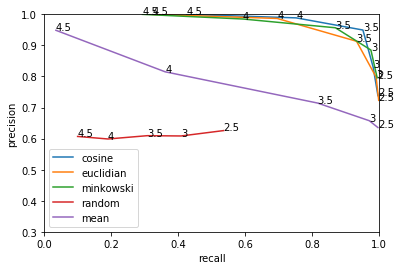

In [57]:
tresholds_recommended = [2.5, 3, 3.5, 4, 4.5]
treshold_used = 3.99

methods = [prediction_cosine, prediction_euclid, prediction_minkowski, predicted_random, predicted_item_mean]

for method in methods:
    precisions = []
    recalls = []
    for treshold in tresholds_recommended:
        precisions.append(get_precision_recall(method, treshold, treshold_used)['precision'])
        recalls.append(get_precision_recall(method, treshold, treshold_used)['recall'])
    plt.plot(recalls, precisions)
    for r, p, t in zip(recalls, precisions, tresholds_recommended):
        plt.text(r, p, t)

plt.xlim(0.0, 1.0)
plt.ylim(0.3, 1.0)
plt.xlabel('recall')
plt.ylabel('precision')

plt.legend(['cosine', 'euclidian', 'minkowski', 'random', 'mean'], loc = 'lower left')